# COVID-19


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans 
import re

# TOP 10 COUNTRIES WITH HIGHEST CASES CONFIRMED

In [3]:
data_world=pd.read_csv('time_series_covid19_confirmed_global.csv')

In [4]:
#add up duplicates
data_world=data_world.groupby('Country').sum()
data_world.reset_index(inplace=True)

In [5]:
data_world.sort_values(by=['Total'],inplace=True,ascending=False)

In [6]:
data_world.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,82279,82361,82432,82511,82543,82602,82665,82718,82809,4847436
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,188172,213372,243616,275586,308850,337072,366667,396223,429052,3657813
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,105792,110574,115242,119827,124632,128948,132547,135586,139422,2217867
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,95923,104118,112065,119199,126168,131646,136675,141942,148220,1762730
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,71808,77872,84794,91159,96092,100123,103374,107663,113296,1363131


In [358]:
data_top_10=data_world.iloc[0:10,:]

Text(0.5, 0, 'Total cases confirmed')

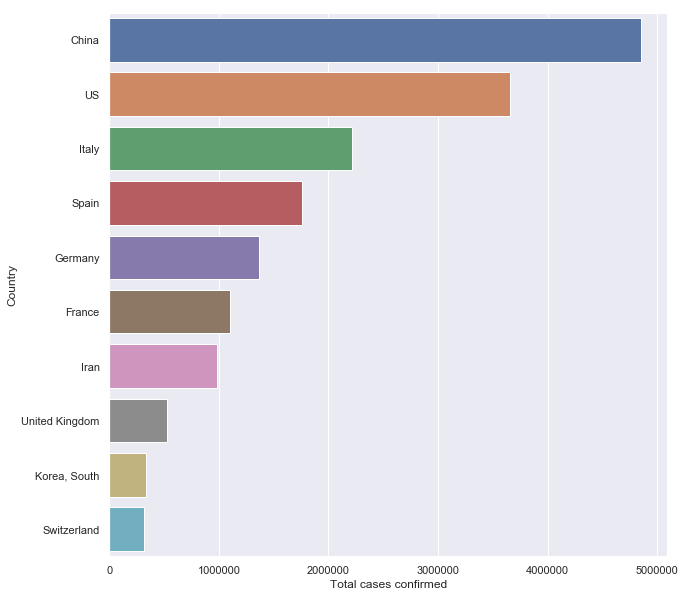

In [360]:
f, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x='Total', y='Country', data=data_top_10)
ax.set_xlabel('Total cases confirmed')


# TOP 10 COUNTRIES WITH HIGHEST DEATHS

In [10]:
data_world1=pd.read_csv("time_series_covid19_deaths_global.csv")


In [11]:
data_world1.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,0.064639,0.068441,0.098859,0.159696,0.212928,0.311787,0.498099,0.505703,...,160.102662,177.980989,201.456274,223.524715,245.650190,263.779468,283.517110,311.273764,335.885932,3693.247148
std,24.779585,70.785949,1.048265,1.049842,1.481991,2.467570,3.207860,4.687336,7.707870,7.708363,...,1017.331043,1105.514797,1216.669266,1326.074756,1434.819008,1524.296508,1623.146724,1760.718198,1885.170408,22070.371632
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.938500,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,23.634500,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,40.000000
75%,41.178850,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.500000,10.500000,13.000000,13.000000,16.500000,18.000000,19.000000,21.500000,22.000000,246.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,12428.000000,13155.000000,13915.000000,14681.000000,15362.000000,15887.000000,16523.000000,17127.000000,17669.000000,240848.000000


In [12]:
data_world1=data_world1.groupby('Country').sum()
data_world1.reset_index(inplace=True)
data_world1.sort_values(by=['Total'],inplace=True,ascending=False)
data_top_10_1=data_world1.iloc[0:10,:]
data_top_10_1
data_top_10_1.reset_index()

,index,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
0,84,Italy,43.0000,12.0000,0,0,0,0,0,0,...,12428,13155,13915,14681,15362,15887,16523,17127,17669,240848
1,36,China,1083.3367,3684.4197,17,18,26,42,56,82,...,3309,3316,3322,3326,3330,3333,3335,3335,3337,172428
2,156,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,8464,9387,10348,11198,11947,12641,13341,14045,14792,152278
3,171,US,37.0902,-95.7129,0,0,0,0,0,0,...,3873,4757,5926,7087,8407,9619,10783,12722,14695,92194
4,61,France,91.3624,59.7192,0,0,0,0,0,0,...,3532,4043,5398,6520,7574,8093,8926,10343,10887,83133
5,80,Iran,32.0000,53.0000,0,0,0,0,0,0,...,2898,3036,3160,3294,3452,3603,3739,3872,3993,62520
6,175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,...,1793,2357,2926,3611,4320,4943,5385,6171,7111,45946
7,120,Netherlands,107.0417,-265.0278,0,0,0,0,0,0,...,1040,1175,1341,1490,1656,1771,1874,2108,2255,19507
8,65,Germany,51.0000,9.0000,0,0,0,0,0,0,...,775,920,1107,1275,1444,1584,1810,2016,2349,16381
9,16,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,705,828,1011,1143,1283,1447,1632,2035,2240,14764


Text(0.5, 0, 'Total deaths')

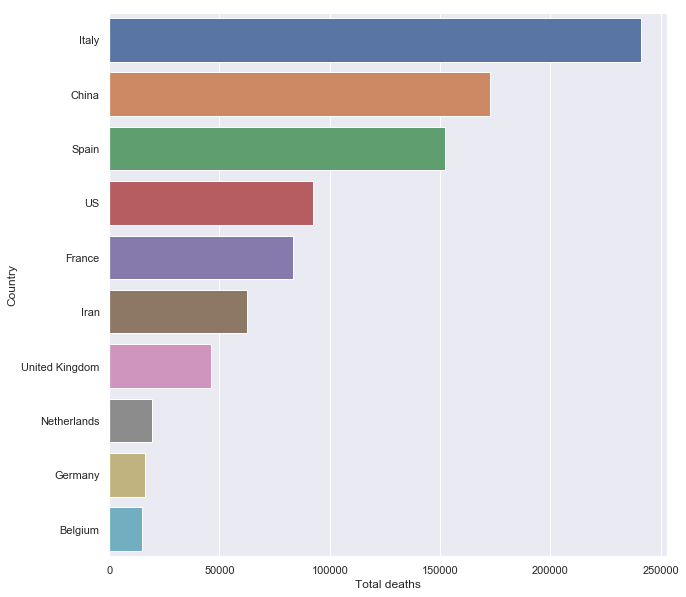

In [13]:
f, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x='Total', y='Country', data=data_top_10_1)
ax.set_xlabel('Total deaths')


# TOP 10 COUNTRIES WITH HIGHEST RECOVERY


Text(0.5, 0, 'Total deaths')

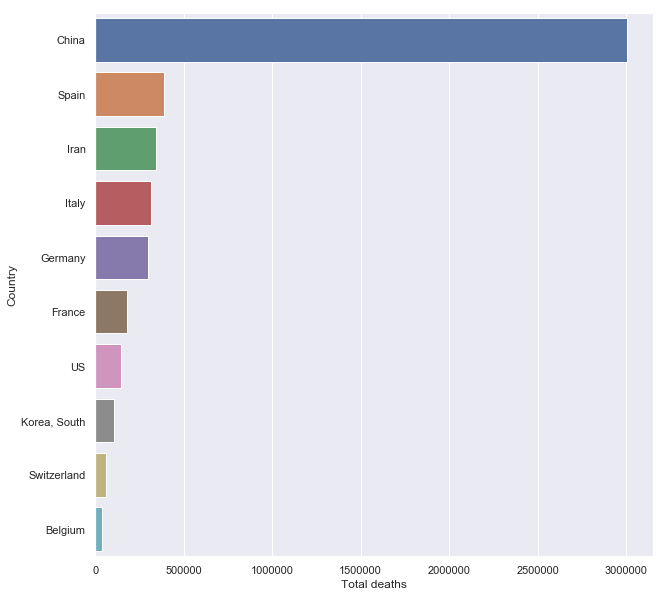

In [14]:
data_world2=pd.read_csv('time_series_covid19_recovered_global.csv')
data_world2=data_world2.groupby('Country').sum()
data_world2.reset_index(inplace=True)
data_world2.sort_values(by=['Total'],inplace=True,ascending=False)
data_top_10_2=data_world2.iloc[0:10,:]
data_top_10_2
data_top_10_2.reset_index()
f, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x='Total', y='Country', data=data_top_10_2)
ax.set_xlabel('Total deaths')


In [15]:
data_top_10_2

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
36,China,1083.3367,3684.4197,28,30,36,39,49,58,101,...,76206,76405,76565,76760,76946,77207,77310,77410,77567,3002147
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,19259,22647,26743,30513,34219,38080,40437,43208,48021,386802
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,14656,15473,16711,17935,19736,19736,24236,27039,29812,343372
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,15729,16847,18278,19758,20996,21815,22837,24392,26491,317130
65,Germany,51.0000,9.0000,0,0,0,0,0,0,0,...,16100,18700,22440,24575,26400,28700,28700,36081,46300,300137
61,France,91.3624,59.7192,0,0,0,0,0,0,0,...,9513,11053,12548,14135,15572,16349,17428,19523,21452,181072
171,US,37.0902,-95.7129,0,0,0,0,0,0,0,...,7024,8474,9001,9707,14652,17448,19581,21763,23559,144003
90,"Korea, South",36.0000,128.0000,0,0,0,0,0,0,0,...,5408,5567,5828,6021,6325,6463,6598,6694,6776,104542
161,Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,...,1823,2967,4013,4846,6415,6415,8056,8704,9800,60283
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,1696,2132,2495,2872,3247,3751,3986,4157,4681,36389


In [16]:
data_mon=pd.read_csv("covid_death_month.csv")

In [17]:
data_mon=data_mon.groupby('Country').sum()
data_mon.reset_index(inplace=True)
data_mon.sort_values(by=['Total'],inplace=True,ascending=False)
data_mon_top=data_mon.iloc[0:10,:]
data_mon_top.reset_index()


,index,Country,Lat,Long,Jan,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,April,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
0,84,Italy,43.0000,12.0000,0,0,0,0,0,0,...,124319,13155,13915,14681,15362,15887,16523,17127,17669,240848
1,36,China,1083.3367,3684.4197,889,17,18,26,42,56,...,26634,3316,3322,3326,3330,3333,3335,3335,3337,172428
2,156,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,97699,9387,10348,11198,11947,12641,13341,14045,14792,152278
3,171,US,37.0902,-95.7129,0,0,0,0,0,0,...,73996,4757,5926,7087,8407,9619,10783,12722,14695,92194
4,61,France,91.3624,59.7192,0,0,0,0,0,0,...,61784,4043,5398,6520,7574,8093,8926,10343,10887,83133
5,80,Iran,32.0000,53.0000,0,0,0,0,0,0,...,28149,3036,3160,3294,3452,3603,3739,3872,3993,62520
6,175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,...,36824,2357,2926,3611,4320,4943,5385,6171,7111,45946
7,120,Netherlands,107.0417,-265.0278,0,0,0,0,0,0,...,13670,1175,1341,1490,1656,1771,1874,2108,2255,19507
8,65,Germany,51.0000,9.0000,0,0,0,0,0,0,...,12505,920,1107,1275,1444,1584,1810,2016,2349,16381
9,16,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,11619,828,1011,1143,1283,1447,1632,2035,2240,14764


In [18]:
#data_reduced.index=data_mon_top.index
data_reduced=pd.DataFrame()
data_reduced['Country']=data_mon_top['Country'].values
data_reduced['Jan']=data_mon_top['Jan'].values
data_reduced['Feb']=data_mon_top['Feb'].values
data_reduced['Mar']=data_mon_top['Mar'].values
data_reduced['April']=data_mon_top['April'].values


In [19]:
data_reduced

,Country,Jan,Feb,Mar,April
0,Italy,0,102,116427,124319
1,China,889,46417,98488,26634
2,Spain,0,0,54579,97699
3,US,0,1,18197,73996
4,France,0,19,21330,61784
5,Iran,0,171,34200,28149
6,United Kingdom,0,0,9122,36824
7,Netherlands,0,0,5837,13670
8,Germany,0,0,3876,12505
9,Belgium,0,0,3145,11619


In [20]:
x1=[0,1,2,3]
y1=list(np.array(data_reduced.iloc[0,1:]))
y2=list(np.array(data_reduced.iloc[1,1:]))
y3=list(np.array(data_reduced.iloc[2,1:]))
y4=list(np.array(data_reduced.iloc[3,1:]))
y5=list(np.array(data_reduced.iloc[4,1:]))
y6=list(np.array(data_reduced.iloc[5,1:]))
y7=list(np.array(data_reduced.iloc[6,1:]))
y8=list(np.array(data_reduced.iloc[7,1:]))
y9=list(np.array(data_reduced.iloc[8,1:]))
y10=list(np.array(data_reduced.iloc[9,1:]))

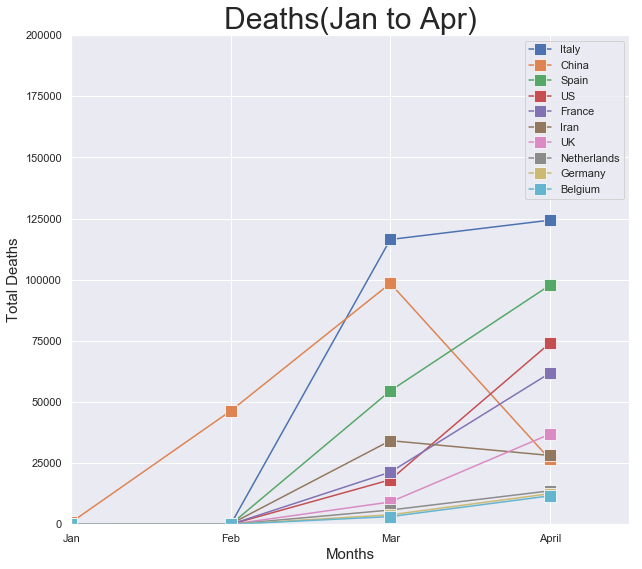

In [21]:
plt.figure(figsize = (10,9))
sns.set(style='darkgrid',)
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = x1, y = y1,label="Italy" ,data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y2,label="China" ,data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y3, label="Spain",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y4,label="US", data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y5, label="France",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y6, label="Iran",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y7, label="UK",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y8, label="Netherlands",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y9, label="Germany",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)
sns.lineplot(x = x1, y = y10, label="Belgium",data = data_reduced, palette = "hot", dashes = False,legend="brief",marker="s",markersize=12)

plt.axis([0, 3.5, 0, 200000]) 
bars=['Jan','Feb','Mar','April']
plt.xticks([0,1,2,3],bars)

plt.title("Deaths(Jan to Apr)", fontsize = 30)
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Total Deaths", fontsize = 15)
plt.show()

# REGION-WISE COMPARISON

In [22]:
raw_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
raw_data.head()


,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,3898
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,4926
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,14866
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,6645
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,148


In [23]:
country_total=pd.DataFrame()
country_total['Country']=raw_data['Country'].values
country_total['Total']=raw_data['Total'].values
country_total.groupby(by=['Country']).sum()

,Total
Country,
Afghanistan,3898
Albania,4926
Algeria,14866
Andorra,6645
Angola,148
Antigua and Barbuda,175
Argentina,17780
Armenia,10228
Australia,80395


In [24]:
bool_series = raw_data["Country"].duplicated() 
  
# displaying data 
#raw_data.head() 
  
# display data 
d=raw_data[bool_series]
d['Country'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'], dtype=object)

In [25]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [26]:
data=raw_data.copy()
data=data.groupby(by=['Country']).sum()
data.reset_index(inplace=True)

In [27]:
data.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,3898
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,4926
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,14866
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,6645
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,148


In [28]:
data['Lat'][8]=-25.73288704
data['Long'][8]=134.4910001

data['Lat'][32]=61.36206324
data['Long'][32]=-98.30777028

data['Lat'][36]=36.56176546
data['Long'][36]=103.8190735

data['Lat'][46]=55.98125296
data['Long'][46]=10.02800992

data['Lat'][120]=52.1007899
data['Long'][120]=5.28144793

data['Lat'][61]=42.17344011
data['Long'][61]=-2.76172945




data['Lat'][175]=18.52585755
data['Long'][175]=-64.47146992
import warnings
warnings.filterwarnings('ignore')

C:\Users\Rithika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rithika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rithika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rithika\Anaconda3\lib\site-packages\ipykernel_

In [29]:
data.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,3898
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,4926
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,14866
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,6645
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,148


In [30]:
x=data.iloc[:,1:3]

In [31]:
x.describe()

,Lat,Long
count,184.000000,184.000000
mean,20.085697,16.541261
std,23.500977,57.403830
min,-40.900600,-102.552800
25%,5.114075,-7.825200
50%,18.630779,19.222550
75%,40.395650,43.517675
max,64.963100,178.065000


In [32]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 2, 2, 2, 0, 3, 3, 4, 1, 2, 4, 3, 4, 1, 3, 2, 2, 3, 0, 1, 3, 2,
       0, 3, 1, 2, 0, 1, 0, 0, 1, 0, 3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 3,
       4, 2, 2, 0, 4, 3, 3, 3, 4, 3, 0, 4, 2, 0, 4, 1, 2, 2, 0, 0, 4, 2,
       0, 2, 3, 3, 0, 0, 3, 3, 2, 3, 2, 2, 4, 1, 4, 4, 2, 4, 2, 3, 1, 4,
       4, 0, 1, 2, 4, 4, 1, 2, 4, 0, 2, 2, 2, 2, 0, 0, 0, 1, 4, 0, 2, 0,
       4, 3, 2, 2, 1, 2, 2, 0, 0, 4, 2, 1, 3, 0, 0, 2, 2, 4, 4, 3, 1, 3,
       3, 1, 2, 2, 4, 2, 4, 0, 3, 3, 3, 2, 0, 4, 0, 2, 4, 0, 1, 2, 2, 4,
       0, 0, 2, 4, 0, 3, 2, 2, 4, 1, 0, 1, 1, 0, 3, 2, 4, 3, 0, 2, 4, 3,
       3, 4, 3, 1, 4, 2, 0, 0])

In [34]:
data_with_c = data.copy()
data_with_c['Cluster'] = identified_clusters


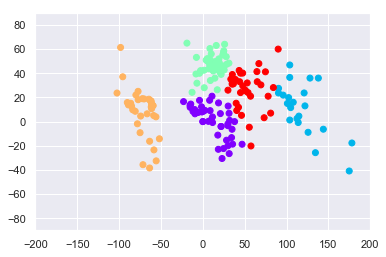

In [35]:
plt.scatter(data['Long'], data['Lat'],c=data_with_c['Cluster'], cmap = 'rainbow')
plt.axis([-200,200,-90,90])
plt.show()

In [36]:
data_with_c.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total,Cluster
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,3898,4
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,4926,2
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,14866,2
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,6645,2
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,148,0


In [37]:
data_with_c=data_with_c.groupby(by=['Cluster']).sum()

In [38]:
tot=data_with_c['Total'].sum()

In [39]:
data_with_c['pct'] = data_with_c.Total / data_with_c.Total.sum()*100

In [40]:
data_with_c.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,Total,pct
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20.116504,559.281713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,61,64,135,135,175,175,218,285,355,454,542,621,634,634,634,691,691,691,705,705,706,706,706,707,709,711,712,714,714,717,718,723,732,736,753,776,812,844,862,950,1031,1145,1262,1382,1643,1945,2245,2584,2941,3077,3412,3602,3819,4135,4453,4872,5172,5538,5813,6148,6582,96475,0.473268
1,235.639131,2611.931209,554,653,937,1428,2108,2915,5561,6143,8210,9891,11996,16741,19829,23839,27581,30740,34271,36993,40018,42553,44590,44968,60114,66587,68664,70787,72721,74511,74933,75475,76062,77759,77980,78444,79117,79838,80803,81720,83001,84189,85019,86033,86660,87323,88100,88696,89116,89383,89581,90022,90163,90579,90989,91513,91924,92443,93035,93729,94416,95439,96899,97706,98870,100103,101547,102813,104620,106278,107501,109049,110554,112208,113769,115241,116369,118106,119327,120783,5531130,27.133532
2,2216.267419,601.752436,0,0,2,3,3,4,8,10,10,14,19,21,23,24,24,24,26,31,33,33,35,35,35,35,36,36,36,36,36,36,53,95,188,262,367,527,789,1073,1442,2166,2691,3311,4266,5637,7360,9461,11937,14672,18016,23006,23739,37509,45373,53779,64127,74852,87822,106116,125320,145769,164263,188762,211031,239277,272099,304757,338747,365640,393802,425789,457766,488555,520899,571707,596168,620022,651681,679734,8363092,41.026015
3,293.627943,-2577.249638,1,1,2,2,6,6,7,7,7,13,14,14,17,17,18,18,21,21,21,26,27,28,29,29,29,29,30,30,30,30,33,33,33,74,75,82,87,96,117,148,179,216,290,398,518,712,935,1072,1535,2009,2439,3549,4546,5463,7420,10035,12536,19306,27044,35688,45695,58865,71866,86942,109448,132401,157479,181609,207687,240938,274321,313418,353566,394006,433533,470409,508461,553900,4731742,23.212051
4,930.117275,1847.876215,0,0,0,1,1,2,2,6,7,9,9,11,12,12,12,12,12,14,14,15,15,15,15,16,16,17,17,17,19,22,37,51,66,90,156,236,362,517,745,1160,1710,2571,3193,3816,5109,6264,7116,7745,8765,10106,11275,12815,14417,15887,17259,18910,20478,22388,24283,26349,28714,31259,34333,39086,43913,50379,56783,63201,69803,77892,85829,94686,102811,111279,120507,130751,140479,150105,1662412,8.155134


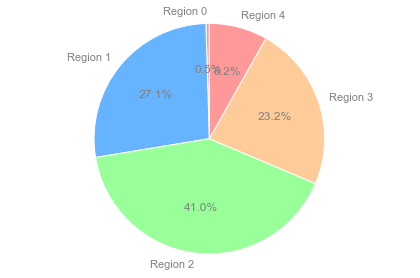

In [41]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Region 0', 'Region 1', 'Region 2', 'Region 3','Region 4']
sizes = list(np.array(data_with_c['Total']))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()